In [19]:
import torch
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import evaluation

from importlib import reload
reload(evaluation)

<module 'evaluation' from '/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/evaluation.py'>

# Load and Check Training results
In this directory the model trainer class stores all embeddings and predictions that were prodcued per epoch.
That way we can monitor how the (2d) embeddings and the class centroids change per epoch.
In this notebook those artifacts get loaded for a sample training run and check for plausibility/correctness.

## Model trained with div and CE

In [20]:
div_model_path = os.getcwd() + "/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240128_1152"

In [21]:
div_epoch_0_results_path = div_model_path + "/epoch_0"
div_epoch_2_results_path = div_model_path + "/epoch_2"

In [22]:
train_embeddings = torch.load(div_epoch_0_results_path + "/train_embeddings.pt")
print("Nr of training embeddings produced in epoch 1 while training (excluded val samples): " + str(len(train_embeddings)) )

Nr of training embeddings produced in epoch 1 while training (excluded val samples): 45000


### After epoch 0 divergence loss
Display embeddings after first epoch of divergence loss training

In [23]:
print(evaluation.describe_epoch_result(div_epoch_0_results_path))

Describe contents in /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240128_1152/epoch_0
------train_embeddings-------
path: /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240128_1152/epoch_0/train_embeddings.pt
type of data: <class 'list'>
length of data: 45000
type of elements: <class 'list'>
first element: [0.9159250855445862, 0.9747055172920227]
length of single sample: 2
------train_labels-------
path: /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240128_1152/epoch_0/train_labels.pt
type of data: <class 'list'>
length of data: 45000
type of elements: <class 'torch.Tensor'>
first element: 7
shape of single sample: torch.Size([])
------train_predictions-------
path: /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/lowdim/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240128_1152

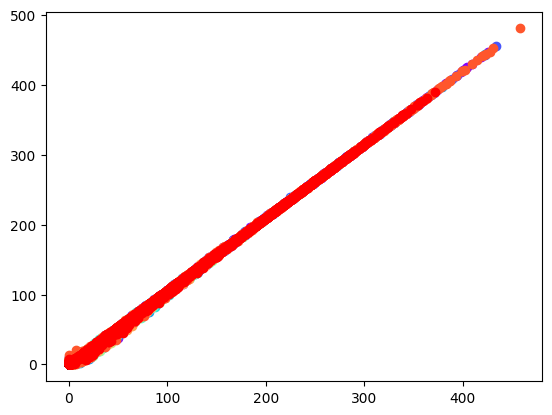

In [24]:
evaluation.plot_2d_embeddings(div_epoch_0_results_path)

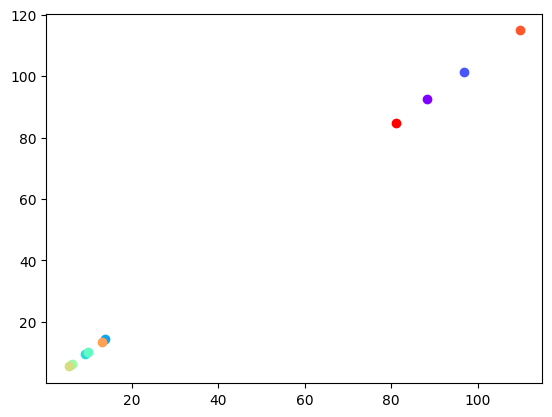

In [25]:
evaluation.plot_2d_class_centroids(div_epoch_0_results_path)

### After epoch 2  divergence loss

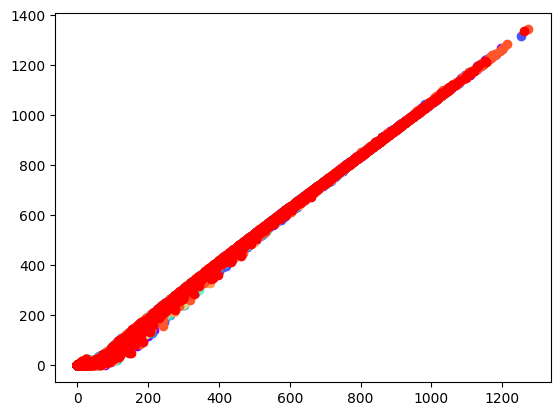

In [26]:
evaluation.plot_2d_embeddings(div_epoch_2_results_path)

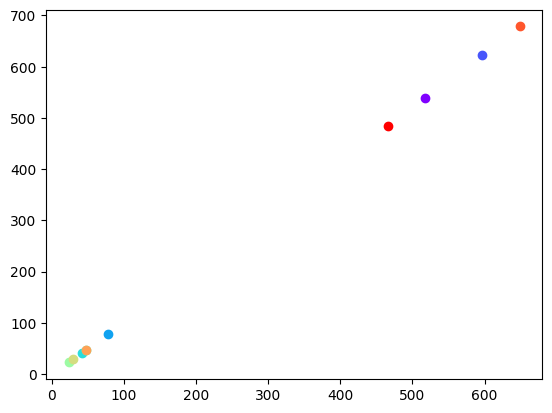

In [27]:
evaluation.plot_2d_class_centroids(div_epoch_2_results_path)

=> Comparing the centroids after epoch 0 with centroids after epoch 2 of divergence loss, we can see, that the divergence loss mainly scales the centroids posistion to maximize the distance. 

### After epoch 0 of cross entropy
The model was trained with 3 epochs of divergence loss. Then it is trained further with cross entropy loss. Show embeddings and centroids after first epoch CE.

In [28]:
ce_model_path = os.getcwd() + "/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240128_1242"
ce_epoch_0_results_path = ce_model_path + "/epoch_0"
ce_epoch_2_results_path = ce_model_path + "/epoch_2"

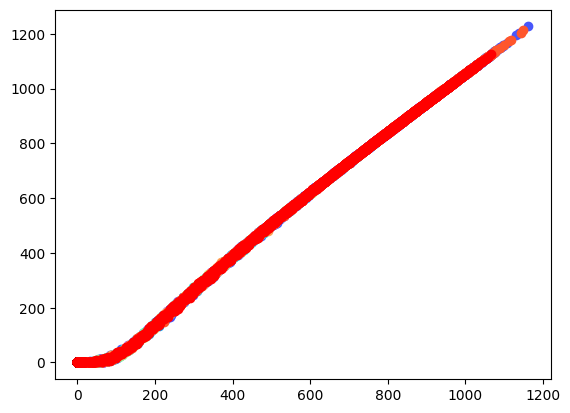

In [29]:
evaluation.plot_2d_embeddings(ce_epoch_0_results_path)

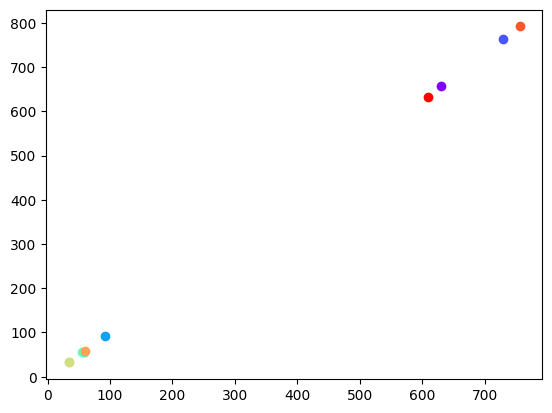

In [30]:
evaluation.plot_2d_class_centroids(ce_epoch_0_results_path)

### After last CE epoch

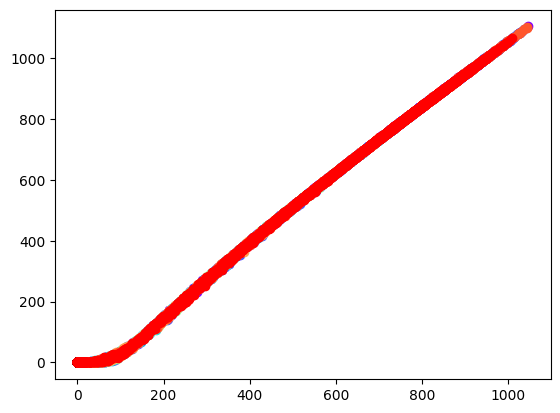

In [31]:
evaluation.plot_2d_embeddings(ce_epoch_2_results_path)

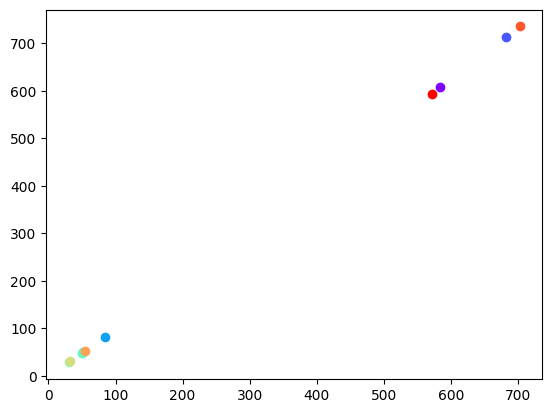

In [32]:
evaluation.plot_2d_class_centroids(ce_epoch_2_results_path)

## Summary of div+CE experiment
### Observations and hypothesis
Each input image is mapped to two features in the embedding space. Weights are initialized randomly, but uniformly distributed.
Consequently the model maps the image to two feature values that are close to on another (why we see all points close to diagonal).
I assume that the average color value of an image determines where on the diagonal its embedding is located. A bright image with pixel RGB values closer to 256, will achieve a bigger value for its two features than a dark one with pixel RGV values closer to 0.
To test this hypothesis we could compare the average pixel value per class and see if the order matches the order of class centroids along the diagonal.

We also see that our divergence loss scales the embedding values. That is the absolute distance between centroids grows, while the relative distance seems to persist. So maybe our loss should implement some regularization: Maximize the centroid distance while keeping embedding values low.

The last observation is that the embeddings do not spread far from the diagonal. 
The loss is calculated from all individual distances between two centroids. Considering only two centroids the partial derivative points along the diagonal for maximizing this distance, because both centroids already lie on the diagonal. Therefore our divergence loss only scales the initial distribution along the diagonal (if we neglect, that the points might lie a little above or beneath the diagonal due to random initialization).

### Explanation of bad accuracy when kickstarting training with div loss
The scaling effect of the divergence loss could explain why our model (custom_cnn/savedmodels/Skipped18LayerForEmbbeding_20240114_2315) that was trained with div loss for 2 epochs and CE for further 38 performed worse the training 40 epochs CE only.
The embeddings get spread far along the diagonal according to their mean pixel value. Now two images that correspond to the same class, but are bright and dark respectively, are very far apart in the embedding space. This makes it hard to move them iteratively until they form a cluster.


### ToDo
- Track embeddings and centroids for 6 epochs only CE. -> Are the embeddings spread further from the diagonal?
- Add regularization term to divergence loss function. -> No more scaling, maybe embeddings move further from diagonal if scaling is no option.
- Get embeddings of untrained model
- Check mean pixel values of images with large embedding values with mean pixel values of images with small embedding values


## Model training only with CE

In [14]:
pure_ce_model_path = os.getcwd() + "/savedlowdimmodels/Skipped18LayerForLowDimEmbbeding_20240129_1210"
pure_ce_epoch_0_results_path = pure_ce_model_path + "/epoch_0"
pure_ce_epoch_5_results_path = pure_ce_model_path + "/epoch_5"
train_embeddings = torch.load(pure_ce_epoch_0_results_path + "/train_embeddings.pt")
print("Nr of training embeddings produced in epoch 1 while training (excluded val samples): " + str(
    len(train_embeddings)))

Nr of training embeddings produced in epoch 1 while training (excluded val samples): 45000


### After epoch 0

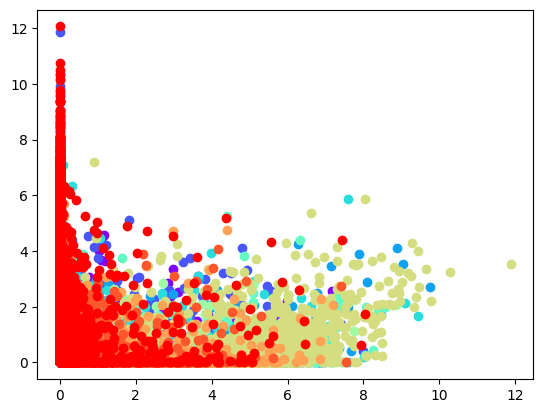

In [15]:
evaluation.plot_2d_embeddings(pure_ce_epoch_0_results_path)

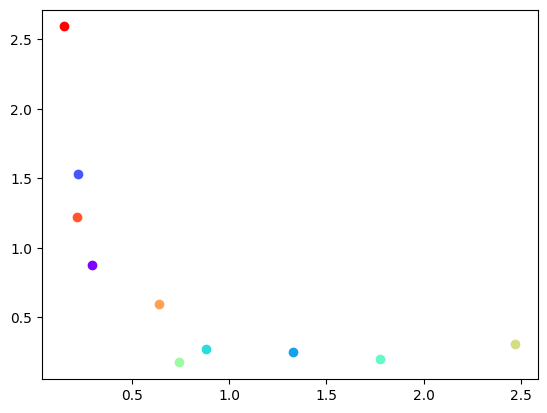

In [16]:
evaluation.plot_2d_class_centroids(pure_ce_epoch_0_results_path)

### After epoch 5

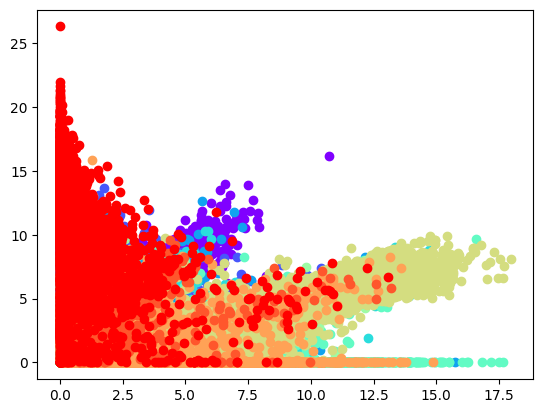

In [17]:
evaluation.plot_2d_embeddings(pure_ce_epoch_5_results_path)

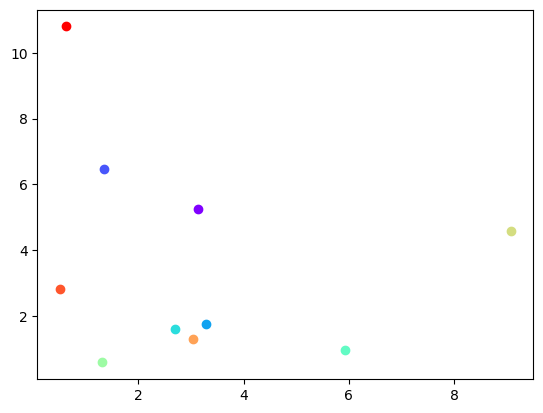

In [18]:
evaluation.plot_2d_class_centroids(pure_ce_epoch_5_results_path)

## Summary of only CE experiment
We see that using only CE leads to the embeddings being spread more evenly in space, instead of being located around the diagonal.